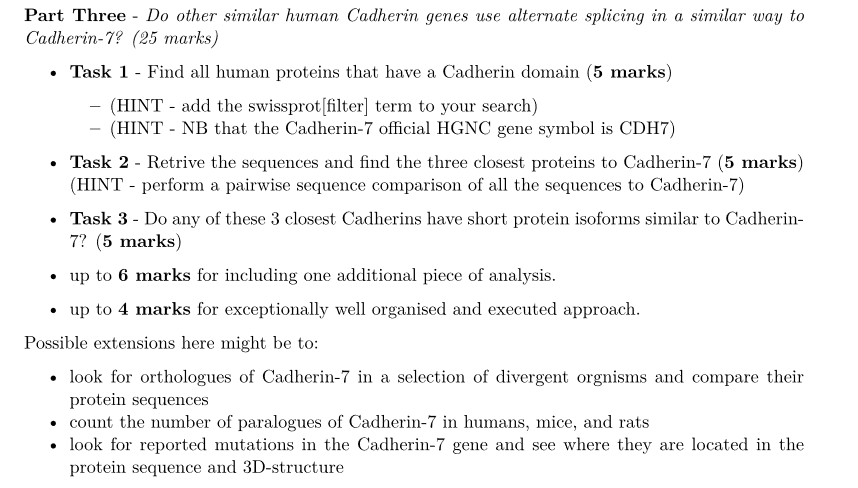

alternative splicing = how many proteins a gene encodes?
protein domain = ? not sure, but know that a protein can have multuple domains

# task 1

is task 1 the same as asking for protein homologs? don't think so -> think it is all proteins encoded by cadherins



In [2]:
from Bio import Entrez
from Bio import SeqIO
from Bio import pairwise2 as pw
from Bio import AlignIO
from Bio import Align as al
from tabulate import tabulate

Entrez.email = "s2055618@ed.ac.uk"

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [3]:
# handle = Entrez.esearch(db='Gene',term="cadherin AND  AND swissprot[filter]",retmax=1000,idtype='acc')
# record = Entrez.read(handle)
# handle.close()

# print(record)

# for p_id in record['IdList']:
#     print(p_id)
    
# gave up on this as including things i DO NOT WANT
# found from NCBI using filters "cadherin AND CDH AND "Homo sapiens"[porgn:__txid9606]"
# then choosing the actual cadherins from the returned list:
# CDH1, CDH11, CDH13, CDH2 (think there are more, not included here)
# what proteins do these encode?
# ~putting a pin in this for now as the search results seem unrealiable (they don't even include CDH7?)
 
 
# conserved domain id (for cadherin)= pfam00028
# https://www.ncbi.nlm.nih.gov/Structure/cdd/PF00028

# searched cadherin[All Fields] AND "Homo sapiens"[porgn] AND swissprot[filter] in the proteins db on ncbi
# gets promising results of 238 and looks legit enough...

handle = Entrez.esearch(db='Protein',term="cadherin[All Fields] AND Homo sapiens[porgn] AND swissprot[filter]",retmax=118,idtype='acc')
record = Entrez.read(handle)
handle.close()

print(record)

table = [[] for i in range(20)]

ind = 0

print_string = ""

for p_id in record['IdList']:
    # todo: print string in latex table format so I don't need ot copy out 230 protein names by hand :(
    #print(p_id)
    table[ind].append(p_id)
    ind = (ind + 1) % 20
# NOTE: are these proteins? i think so?

#print(tabulate(table, tablefmt="grid"))

for r in table:
    temp = ""
    for j in range(len(r)):
        temp = temp + r[j]
        temp = temp + (' & ')
    temp = temp[:-2]
    temp = temp + '\\\\'
    print(temp)

#print(len(table[0]))



{'Count': '238', 'RetMax': '118', 'RetStart': '0', 'IdList': ['Q99755.1', 'Q14160.5', 'P17301.2', 'Q8IXH8.4', 'Q8TDW7.3', 'P0DME0.1', 'Q9H251.2', 'A6NIX2.3', 'Q14517.2', 'Q8NEM7.2', 'P33151.5', 'Q12864.3', 'Q9HBB8.3', 'Q9NYQ8.2', 'Q9ULB5.2', 'O00257.3', 'Q9NYQ7.2', 'P38570.3', 'Q5VST9.3', 'Q9BYE9.2', 'A6H8M9.1', 'A7KAX9.1', 'Q9HBT6.2', 'Q6V0I7.2', 'Q96JP9.2', 'Q9P266.3', 'P55289.2', 'P22223.2', 'P55287.2', 'P0C2W1.1', 'O94885.3', 'Q9ULB4.2', 'P54920.3', 'P51532.2', 'Q8N3R9.3', 'P19022.4', 'Q9Y6N8.2', 'Q86T24.2', 'P55283.2', 'Q9BWV1.1', 'Q8N7E2.1', 'Q6ZTQ4.1', 'Q6UX06.1', 'Q9UK76.3', 'Q96E93.1', 'Q9Y283.2', 'Q9H9C1.1', 'Q86UP0.1', 'Q15047.1', 'Q9UJ99.2', 'Q9NYQ6.1', 'Q9HCU4.1', 'Q9H159.1', 'P55286.2', 'O75309.1', 'Q9Y297.1', 'O95863.2', 'O43623.1', 'Q9Y5X3.1', 'Q9UNH7.1', 'Q13634.1', 'P55291.1', 'P55290.1', 'P55285.1', 'P46940.1', 'P12830.3', 'P26010.1', 'Q9Y5E3.2', 'Q6UWL6.3', 'Q9Y5E4.2', 'Q9NRJ7.4', 'Q6V1P9.2', 'Q9UN66.4', 'Q9Y5E6.2', 'Q96SB3.3', 'Q9H307.5', 'Q9Y5G1.4', 'Q9Y5G9.2', 'Q

Found on NCBI ConservedDomain search (CD-Search):

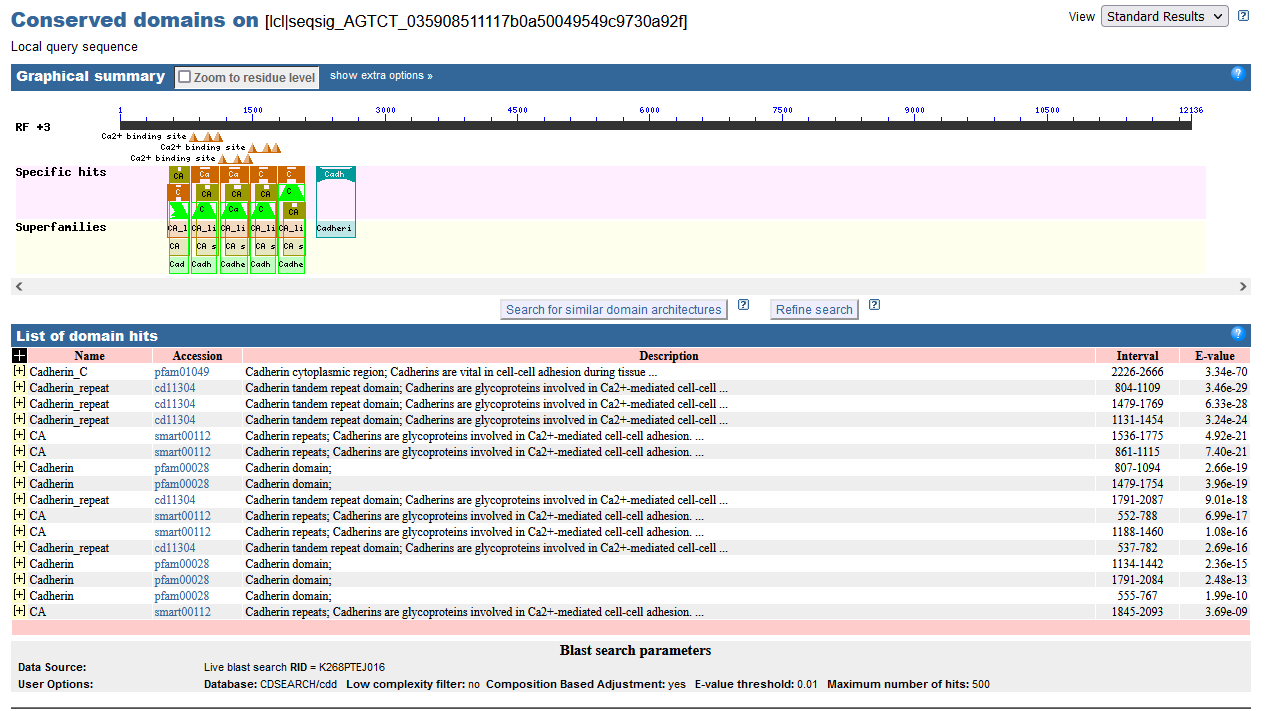

# task 2

In [4]:
# getting cadherin protein IDs
handle = Entrez.esearch(db='Protein',term="cadherin[All Fields] AND Homo sapiens[porgn] AND swissprot[filter]",retmax=117,idtype='acc')
record = Entrez.read(handle)
handle.close()

protein_ids = record['IdList']

handle = Entrez.efetch(db="nucleotide", id="NM_004361.5", rettype="gb", retmode="text")
cdh7_tcpt = SeqIO.read(handle, "genbank")
handle.close()
print(cdh7_tcpt.seq)

for feature in cdh7_tcpt.features:
    # get the encoded protein of our cdh7 transcript (NM_004361.5)
    if feature.type == "CDS":
        temp = feature.location.extract(cdh7_tcpt).seq
        cdh7_protein_seq = temp.translate()[:-1]

handle = Entrez.efetch(db="protein", id=protein_ids, rettype='fasta',retmode="text")
records = list(SeqIO.parse(handle, "fasta"))
handle.close()
# note: just get the top hit fasta transcript of a protein

# TODO: need to figure out what kind of sequence alignment is the most suitable...
mx = al.substitution_matrices.load('PAM250')
a_scores = []

# iterate through all protein sequences and pw align them with cdh7 (which transcript?)
# pws align w NM_004361.5
for i in range(len(records)):
    curr_pro_seq = records[i].seq
    # using local alignment!!!
    alignments = pw.align.globalds(cdh7_protein_seq, curr_pro_seq, mx, -10, -0.5)
    a_score = alignments[0][2]
    a_scores.append((a_score, records[i]))
    
    
# are higher scores better?? -> yes
# note: this sorts in asc order so best scores are at the end
a_scores.sort(key=lambda x: x[0])

print(a_scores, '\n')

print("best three alignments (score, seq data) [worst->best]:")
# omitting the best alignment (as it's cdh7)
for tup in a_scores[-4:-1]:
    print(tup)
    
# best three are Cadherin-10, Cadherin-8 and Cadherin-20

AGTCTGCCCCGCGCGCGGAGCTGCGCGCACTGGGTCCCCAAGAGCCCGCGGGCGTCCGGCAGCCGAGCGCACGTTCTTTCGGATGCACACGCCCGGGTCCCTGGCGTCTGACGCCGTGGGGAGGGCAGCGAGGCCCCAGGTACTTACTACACCATTCTTTGGCGAAGGCTATTCAGCAGTGGTGACCTCTTCCAATCCAACACTCTACAGATTATTATCTCTGGACTCCCAGCTGACACCCTGCCGGAGGCAAGAGCTACTAAGCCAACTGGAACTGTGCCTTTTCTCTTGTCAAGGTTTTTTTCTTACACAGGAAAAAGAAAGAAAAAAAAAAGATGAAGTTGGGCAAAGTGGAGTTCTGCCATTTTCTGCAGCTAATAGCTCTTTTCCTGTGTTTTTCTGGGATGAGTCAAGCAGAACTCTCAAGGTCCAGATCAAAGCCCTATTTCCAATCAGGGAGGTCCCGGACCAAGCGCAGCTGGGTGTGGAATCAGTTCTTTGTGCTGGAGGAATACATGGGTTCAGACCCCCTCTATGTAGGAAAGCTTCACTCTGATGTTGATAAAGGAGATGGTTCCATCAAATACATCTTGTCAGGCGAAGGGGCAAGTTCCATTTTCATTATTGATGAGAACACTGGGGATATTCATGCCACCAAGAGACTGGATCGTGAGGAGCAGGCCTACTACACGCTCCGAGCTCAAGCGCTGGATAGGCTCACCAACAAACCCGTGGAGCCCGAGTCGGAGTTTGTCATCAAAATTCAGGATATCAACGACAATGAACCCAAATTTTTGGATGGCCCATACACGGCAGGAGTTCCCGAAATGTCTCCCGTGGGGACCTCAGTGGTACAAGTGACAGCGACGGATGCTGATGATCCTACATATGGCAACAGTGCCAGAGTGGTCTACAGTATTCTGCAAGGACAGCCGTACTTCTCAGTGGAGCCAAAGACAGGAGTCATCAAGACTGCCCTTCCAAACATGGATAGAGAGGC

In [16]:
#print(a_scores[-1])

print(a_scores[-2][1].id)

# TODO: graph these scores??

sp|P55286.2|CADH8_HUMAN


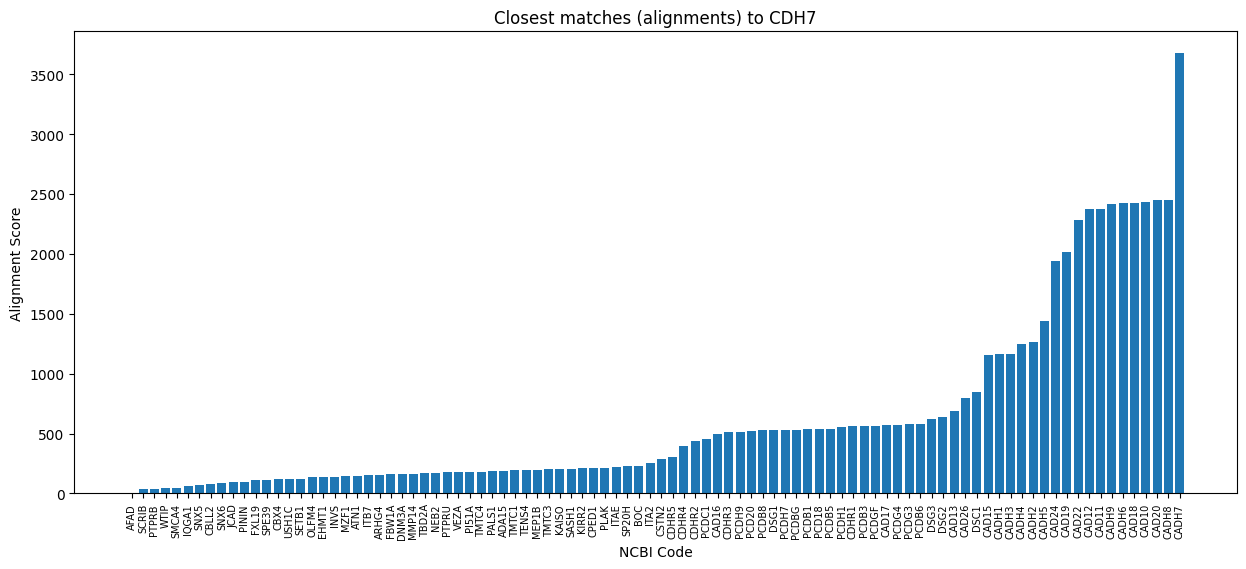

In [38]:
from matplotlib import pyplot as plt

# I LOVE FUNCTIONAL PROGRAMMING

cad_ids = list(map(lambda x: x[1].id.split('|')[-1].split('_')[0], a_scores))
cad_scores = list(map(lambda x: x[0], a_scores))

cad_scores = list(filter(lambda x: x > 0, cad_scores))
cad_ids = cad_ids[len(cad_ids)-len(cad_scores):]

plt.figure(figsize=(15, 6))

plt.bar(cad_ids, cad_scores)

plt.xticks(rotation=90, fontsize=7)  # Rotate text 90 degrees and set font size to 7


# Add labels and title
plt.xlabel('NCBI Code')
plt.ylabel('Alignment Score')
plt.title('Closest matches (alignments) to CDH7')

# Display the plot
plt.show()

# task 3
Question is: Do any of these similar p isoforms have short proteins similar to CDH7

In [7]:
# CDH10 ID: Q9Y6N8.2
# CDH8 ID: P55286.2
# CDH20 ID: Q9HBT6.2

# by short protein isoform he just means do they use alternate splicing in the same way as CDH7 to produce a shorter (soluble) protein

# method: Looking up on Ensembl as it says if the transcripts are protein coding or not, easier to see relevant information

# looking on ensembl it looks like the smaller vers of CDH10 are not protein encoding

# current method is just comparing exon counts for each of the transcipt's proteins, looking for an protein isoform that is missing one exon
# at the end of the sequence like it does in CDH7.

# In CDH10 & CDH20 though, both seem to use splicing in the same way with 12 exons incl. 11 coding ones, then have a shorter protein isoform with just 11 exons (all coding) total

# How to investigate further?
# I guess we can look at how to specific exons are placed, i.e. in CDH7 they have all but the final exon, is this the same with CDH10 and CDH20?




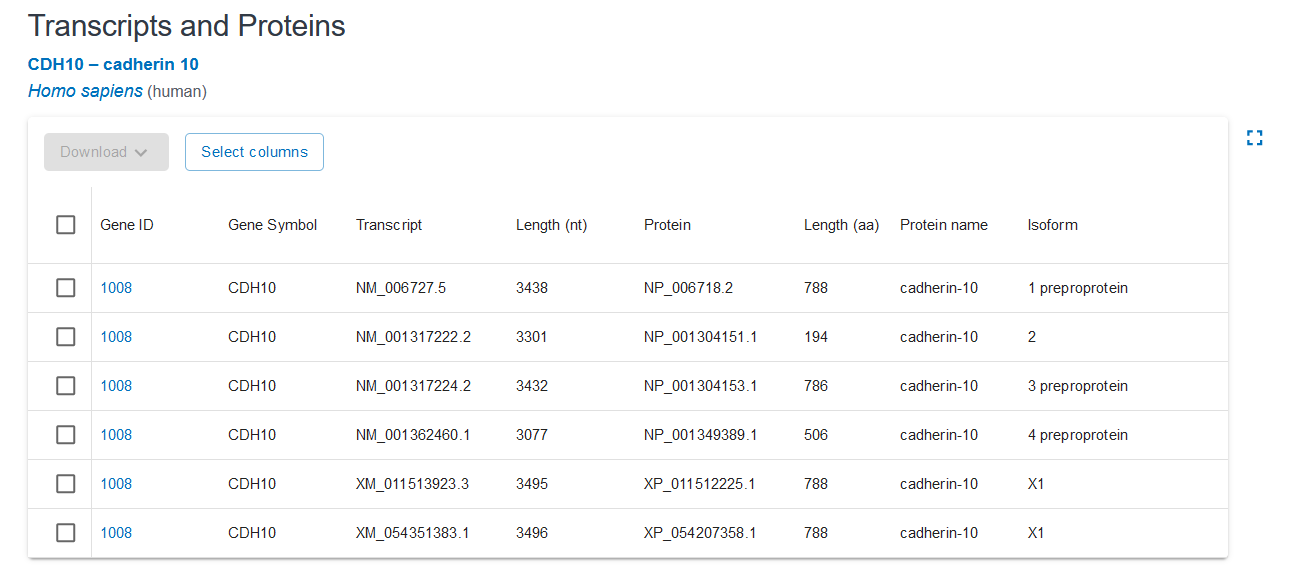

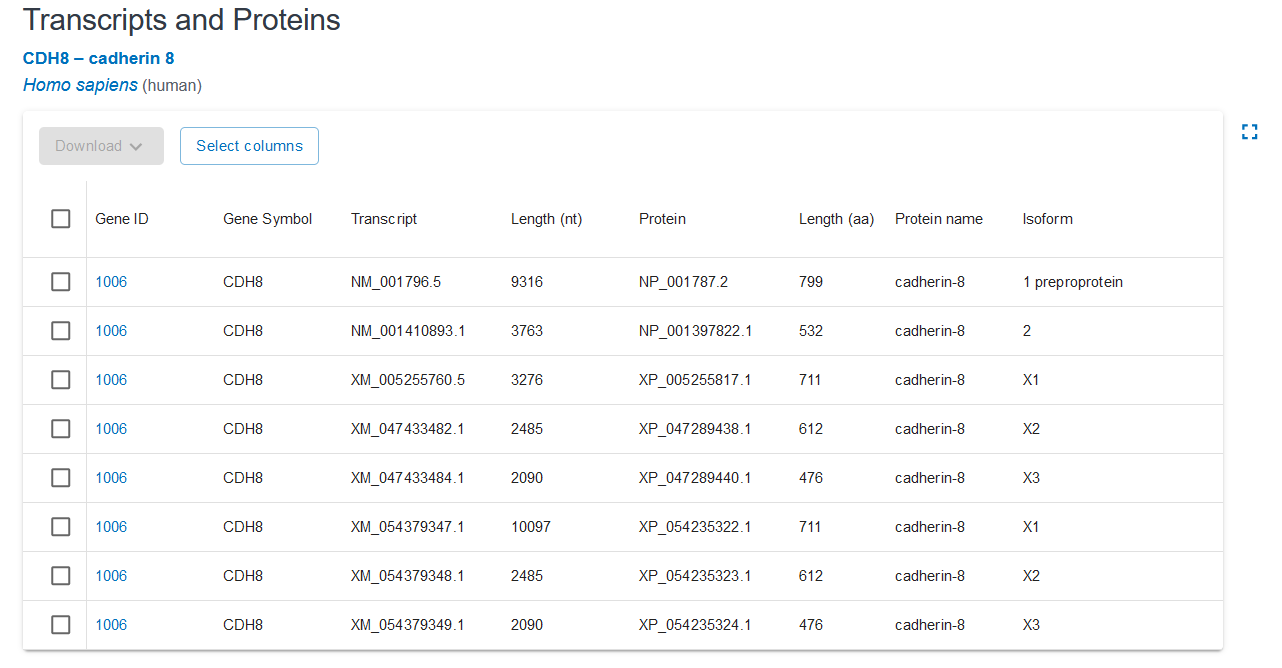

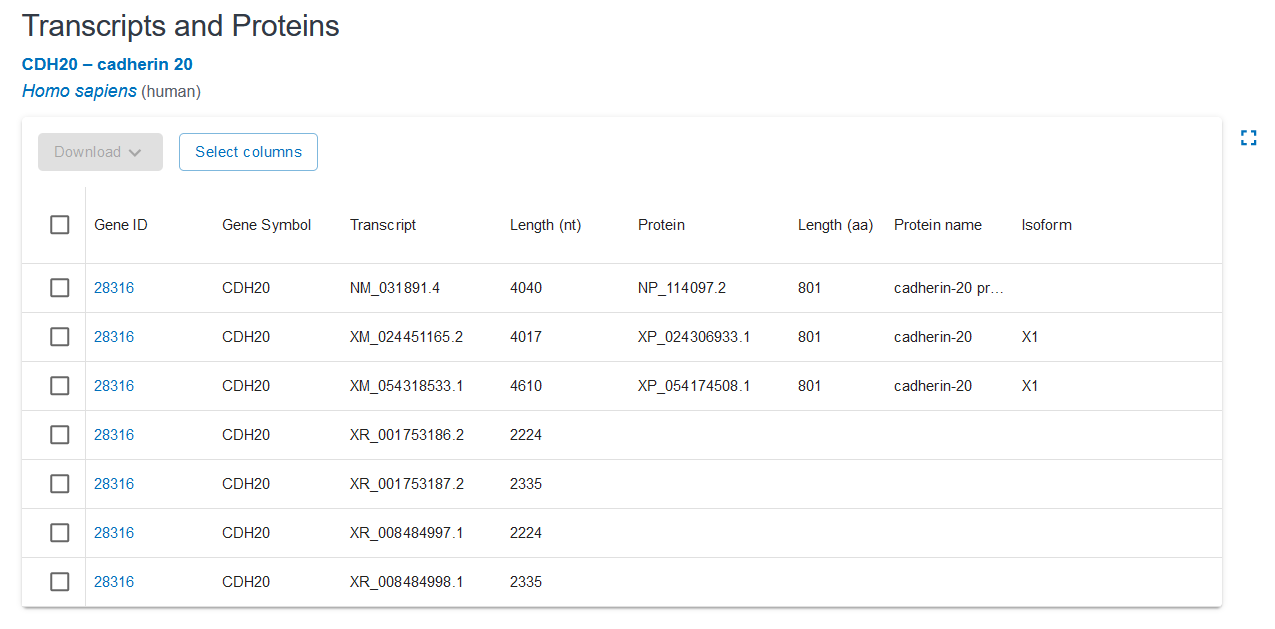

In [8]:
# EXtension task: counting the number of CDH7 paralogues in human, mice and chicken

# https://www.biostars.org/p/102733/
# or maybe I can use NCBI??


# gonna blast a human cdh7 protein??
# Nah just gonna explore EggNOG 6.00

# 1. searched up homo sapiens cadherin-7
# 2. opened up Eukaryota orthology results
# 3. Entered rodentia area (mice and rats are both rodents obvs)
# 4. expanded the rodentia area
# 5. can click on rattus and mus segments for orthalog/paralog counts

# to find human ortholog clicked into Hominidae section
# then homo sapiens
# 105 orthologs

# results:
# Rattus = 93
# Mus = 535